<a href="https://colab.research.google.com/github/mkap007/Python_For_Geospatial_Analysis/blob/main/Rainfall__prediction_spatialdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2 style="color:Orange">Rainfall Prediction Using Linear Regression Model</h2></center>
<br><br>
<h3 style="color:Blue">Masud Karim</h3>
<h4 style="color:Green">23070241029</h4>


**Importing Necessary Libraries**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import geopandas as gpd
from scipy.interpolate import griddata
import math

**Importing Datafile**

In [31]:
data = pd.read_csv("/content/Data.csv")

The dataset I exported from arcgis as table that doesn't have the LAT LONG field.
Then I have used same data file with X Y field. I used the shapefile and online webportal(https://mygeodata.cloud/converter/shp-to-csv) to convert the shapefile into CSV, that's how I got the X Y field.

In [32]:
data.head(5)

,X,Y,CID,Rainfall,Temperatur,WaterVapor
0,-566941.3810,1.059382e+06,1,139.417,20.8833,1.78083
1,-592954.7867,1.110028e+06,1,159.000,23.8750,2.11333
2,-644944.9022,1.140943e+06,1,266.583,26.9417,2.60167
3,-596133.8121,1.131696e+06,1,201.917,18.3750,1.60750
4,-591142.5077,1.080965e+06,1,182.667,22.1000,1.95417


In [33]:
data.columns

Index(['X', 'Y', 'CID', 'Rainfall', 'Temperatur', 'WaterVapor'], dtype='object')

In [34]:
data.shape

(2951, 6)

In [36]:
data.describe()

,X,Y,CID,Rainfall,Temperatur,WaterVapor
count,2951.000000,2.951000e+03,2951.0,2951.000000,2951.000000,2951.000000
mean,-603955.144533,1.115479e+06,1.0,198.117947,22.724853,2.050268
std,23693.493515,2.964943e+04,0.0,38.444813,2.975725,0.350537
min,-667088.975100,1.041333e+06,1.0,123.000000,13.700000,1.163330
25%,-618738.341650,1.092395e+06,1.0,167.291500,21.166700,1.840830
50%,-599345.875800,1.124897e+06,1.0,191.333000,22.533300,1.987500
75%,-586232.663650,1.139197e+06,1.0,225.041500,24.825000,2.282085
max,-558003.666400,1.159089e+06,1.0,279.083000,27.591700,2.769170


**Finding the Correlation Between Variables**

In [41]:
correlation_data = data[['Rainfall', 'Temperatur', 'WaterVapor']]

In [42]:
correlation_matrix = correlation_data.corr()

In [108]:
correlation_matrix

,Rainfall,Temperatur,WaterVapor
Rainfall,1.000000,0.660754,0.746042
Temperatur,0.660754,1.000000,0.987063
WaterVapor,0.746042,0.987063,1.000000


**Heatmap Of Correlation Matrix**

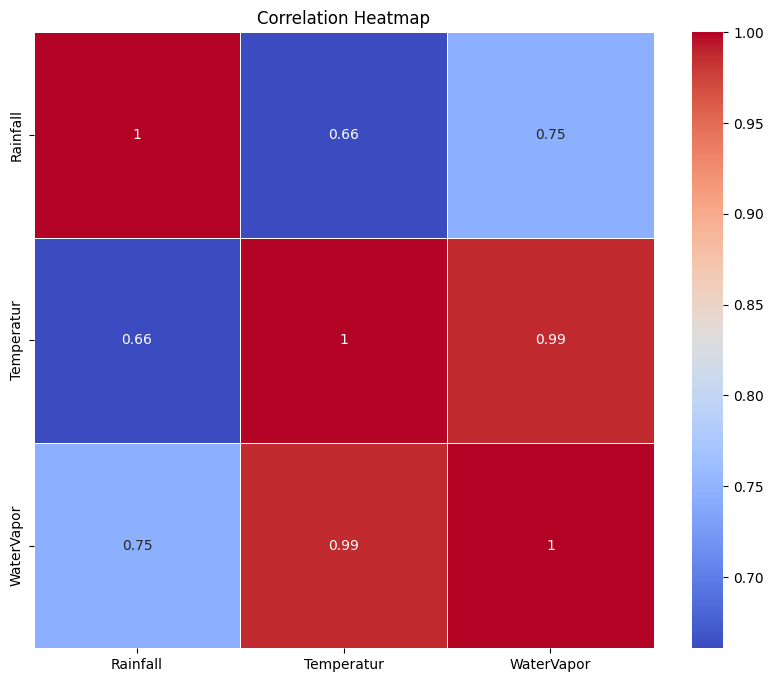

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

This plot shows the correlation between variables like Rainfall, Temperature, and Water Vapor. Darker colors indicate stronger correlations, helping to identify the relationships between these variables.

**Model: Linear Regression**

In [45]:
X = data[['X', 'Y', 'Temperatur', 'WaterVapor']]

In [46]:
Y = data.Rainfall

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state= 42)

In [48]:
xtrain.shape

(2065, 4)

In [49]:
ytrain.shape

(2065,)

In [50]:
xtest.shape

(886, 4)

In [51]:
xtrain.head()

,X,Y,Temperatur,WaterVapor
2647,-596864.6119,1.086306e+06,22.9417,2.05583
1951,-619128.5227,1.146764e+06,24.8333,2.27833
788,-570679.2300,1.069254e+06,21.7167,1.87750
1068,-582813.5104,1.064414e+06,21.5750,1.90250
911,-598201.3313,1.123578e+06,22.8000,2.00500


**Scaling**

In [52]:
xtrain=StandardScaler().fit_transform(xtrain)

In [53]:
xtest=StandardScaler().fit_transform(xtest)

In [54]:
model=LinearRegression().fit(xtrain,ytrain)

In [55]:
ypred=model.predict(xtest)

**Different Error Matrics**

In [56]:
r2_score(ytest,ypred)

0.9349614624758583

In [57]:
mean_squared_error(ytest,ypred)

99.11408592911799

In [58]:
mean_absolute_error(ytest,ypred)

7.43856373826446

**Ploting the Scatter plot for Comparision of Observed data and Predicted Data**

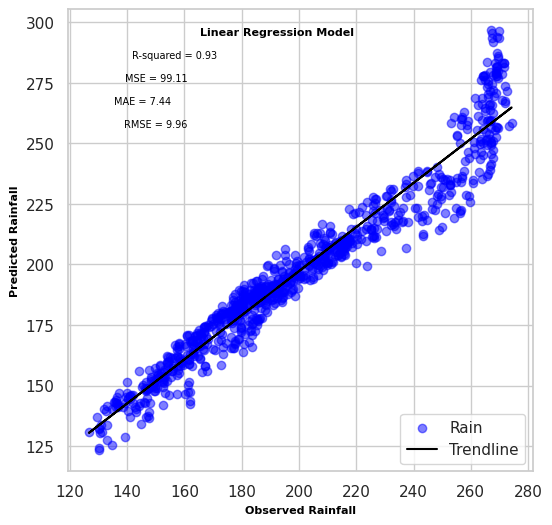

In [107]:
colors = np.random.rand(1133)
plt.figure(figsize=(6, 6))
plt.scatter(ytest, ypred, label='Rain',color='blue', alpha = 0.5)

m, b = np.polyfit(ytest, ypred, 1)
plt.plot(ytest, m*np.array(ytest) + b, label='Trendline',color='black')

r_squared =r2_score(ytest, ypred)
rounded_r=round(r_squared,2)
MSE_score=round(mean_squared_error(ytest,ypred),2)
Mae_score = round(mean_absolute_error(ytest,ypred),2)
Rmse_score = round(math.sqrt(MSE_score),2)
plt.text(0.45, 0.95, 'Linear Regression Model', ha='center', va='center', transform=plt.gca().transAxes,fontsize=8, color='black',fontweight='bold')
plt.text(0.23, 0.90, f'R-squared = {rounded_r}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')
plt.text(0.19, 0.85, f'MSE = {MSE_score}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')
plt.text(0.16, 0.80, f'MAE = {Mae_score}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')
plt.text(0.19, 0.75, f'RMSE = {Rmse_score}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')

plt.xlabel('Observed Rainfall',fontsize=8, color='black',fontweight='bold')
plt.ylabel('Predicted Rainfall',fontsize=8, color='black',fontweight='bold')
plt.legend(loc='lower right')
plt.show()

This scatter plot compares the actual observed rainfall values with the predicted ones. The black trendline shows the general direction of the relationship, and closer points to the line indicate better predictions.

**Ploting the Residual Errors**

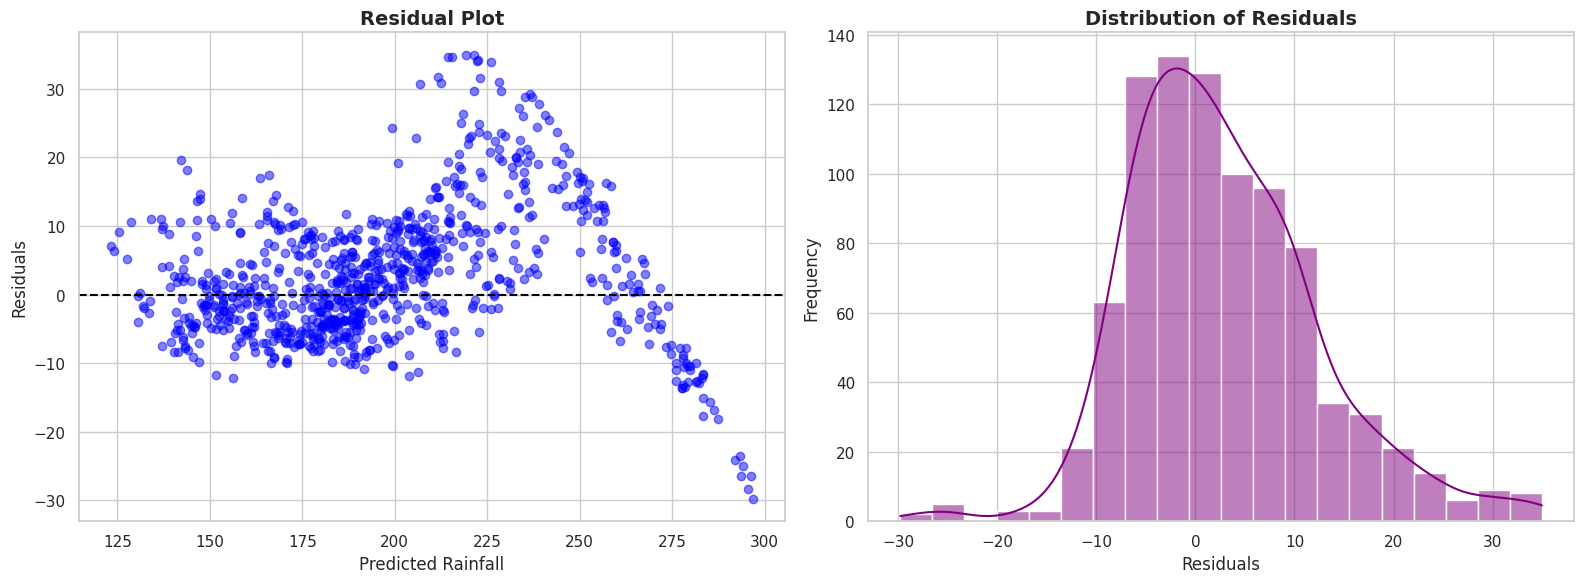

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].scatter(ypred, residuals, color='blue', alpha=0.5)
axes[0].axhline(y=0, color='black', linestyle='--')
axes[0].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Rainfall', fontsize=12)
axes[0].set_ylabel('Residuals', fontsize=12)

sns.histplot(residuals, bins=20, kde=True, color='purple', ax=axes[1])
axes[1].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Residuals', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

The residual plot visualizes the difference between predicted and observed rainfall (residuals). Ideally, residuals should be randomly distributed around the zero line, indicating a good model fit. And the histogram shows the distribution of residuals with a smooth KDE line. A normal distribution centered around zero would indicate the errors are evenly distributed, suggesting a well-fitted model.

**Pair Plot between Variables**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

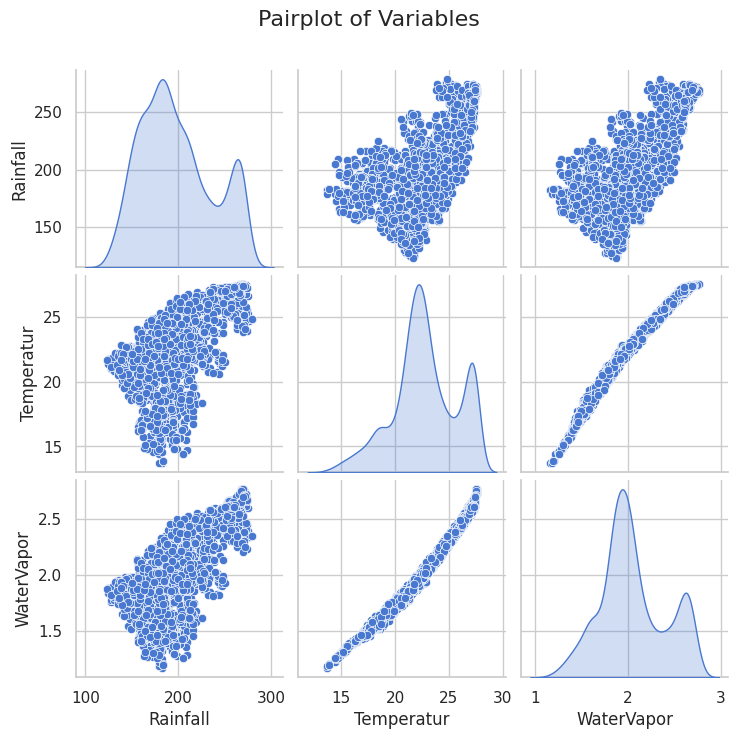

In [103]:
custom_palette = sns.color_palette("Blues", as_cmap=True)
sns.pairplot(correlation_data, diag_kind="kde", palette=custom_palette)
plt.suptitle("Pairplot of Variables", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.grid(color='lightgray')
plt.show()

The pairplot shows pairwise relationships between variables (Rainfall, Temperature, and Water Vapor) along with density plots on the diagonals, helping identify trends and distributions

**Ploting the Variable Importance**

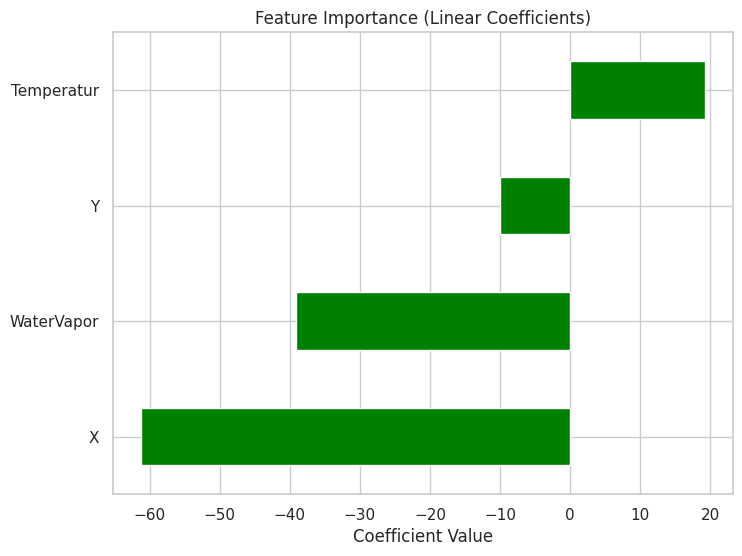

In [105]:
coef = pd.Series(model.coef_, index=['X', 'Y', 'Temperatur', 'WaterVapor'])
coef.sort_values().plot(kind='barh', figsize=(8, 6), color='green')
plt.title('Feature Importance (Linear Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()


This bar plot shows the importance of each feature (Temperature, and Water Vapor) in predicting rainfall, based on the linear model's coefficients. (I didn't remove the X Y field cause for interpolation I need it)

In [63]:
print(X.columns)

Index(['X', 'Y', 'Temperatur', 'WaterVapor'], dtype='object')


In [64]:
predictions = pd.DataFrame({
    'X': xtest[:, 0],
    'Y': xtest[:, 1],
    'Predicted_Rainfall': ypred
})

predictions.to_csv('predicted_rainfall.csv', index=False)

In [69]:
predictions.head(5)

,X,Y,Predicted_Rainfall
0,70.511256,-0.000002,190.912353
1,70.511259,0.000011,189.399857
2,70.511248,0.000010,230.234860
3,70.511251,0.000008,198.125931
4,70.511251,0.000003,206.706235


**Final Predicted Map**

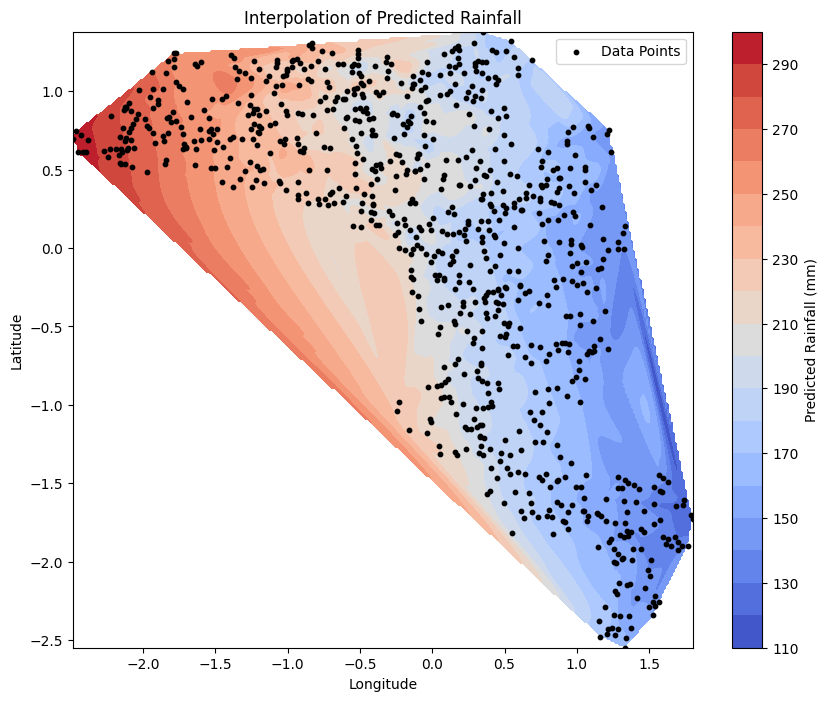

In [85]:
predictions = pd.read_csv('/content/predicted_rainfall.csv')
grid_res = 300
grid_x, grid_y = np.mgrid[
    predictions['X'].min():predictions['X'].max():grid_res*1j,
    predictions['Y'].min():predictions['Y'].max():grid_res*1j
]

points = np.array(list(zip(predictions['X'], predictions['Y'])))
values = predictions['Predicted_Rainfall']
grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')
plt.figure(figsize=(10, 8))
plt.contourf(grid_x, grid_y, grid_z, levels=20, cmap='coolwarm')
plt.colorbar(label='Predicted Rainfall (mm)')
plt.scatter(predictions['X'], predictions['Y'], c='black', s=10, label='Data Points')
plt.title('Interpolation of Predicted Rainfall')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


This Interpolation representing the predicted rainfall across a grid of X and Y coordinates. The color gradient shows different levels of rainfall, with darker regions indicating higher predicted rainfall values.

<br><br>
<h7><i>Thank You Sir
<br><br>
**For getting the better visualization I have used some web based informations, and I learned so many New things.<h7>